In [25]:
import os
import glob
import json
import numpy as np
exp = "../experiments/multidataset"

# get all subdirectories, excluding files
runs = [d for d in glob.glob(exp + "/*") if os.path.isdir(d)]
runs = sorted(runs, key=lambda x: int(x.split("/")[-1]))
# runs = sorted(runs)
print(runs)


over_all = {
    "per_frame_psnr": [],   # psnr[run] = value, value[frame][step] = v
    "per_frame_ssim": [],
    "per_frame_lpips": [],
    "peak_step": [],
}
avg = lambda x: sum(x) / len(x)

def parse(file):
    with open(file, "r") as f:
        raw = f.readlines()
    ret = None
    selector = lambda a, b: a if b is None or avg(a['psnr']) > avg(b['psnr']) else b
    for l in raw:
        value = json.loads(l)
        ret = selector(value, ret)
    return ret
        

for r in runs:
    if not os.path.exists(os.path.join(r, "stat.json")):
        continue
    metrics = parse(
        os.path.join(r, "stat.json"))
    over_all["per_frame_psnr"].append(metrics["psnr"])
    over_all["per_frame_ssim"].append(metrics["ssim"])
    over_all["per_frame_lpips"].append(metrics["lpips"])

over_all["per_frame_psnr"] = np.array(over_all["per_frame_psnr"])
over_all["per_frame_ssim"] = np.array(over_all["per_frame_ssim"])
over_all["per_frame_lpips"] = np.array(over_all["per_frame_lpips"])


['../experiments/multidataset/1', '../experiments/multidataset/2', '../experiments/multidataset/3', '../experiments/multidataset/4', '../experiments/multidataset/5', '../experiments/multidataset/6', '../experiments/multidataset/7', '../experiments/multidataset/8', '../experiments/multidataset/9', '../experiments/multidataset/10', '../experiments/multidataset/11']


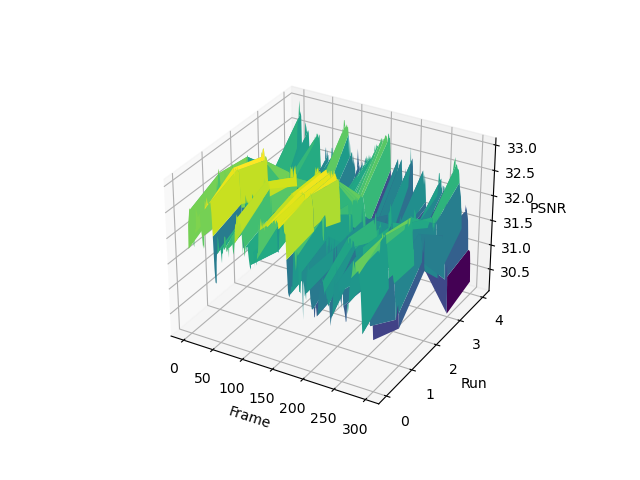

In [26]:
import matplotlib.pyplot as plt
%matplotlib widget




# draw a 3d plot for psnr, x is frame, y is run, z is psnr
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
X = np.arange(over_all["per_frame_psnr"].shape[1])
Y = np.arange(over_all["per_frame_psnr"].shape[0])
X, Y = np.meshgrid(X, Y)
Z = over_all["per_frame_psnr"]

X = X[:5]
Y = Y[:5]
Z = Z[:5]

# just plot perframe curve, not surface
# for i in range(over_all["per_frame_psnr"].shape[0]):
#     ax.plot(X[i], Y[i],  Z[i], label=f"Run {i+1}")

# plot surface
ax.plot_surface(X, Y, Z, cmap='viridis')

ax.set_xlabel('Frame')
ax.set_ylabel('Run')
ax.set_zlabel('PSNR')
plt.show()




psnr: [32.03846026 32.22065324 32.14853949 31.47800447 32.06933027 28.32400002
 27.97945262 28.26230457 28.10749718 28.49734179 28.69335681], ssim: [0.94703521 0.94834284 0.94767221 0.94483819 0.94505214 0.90905211
 0.90761037 0.90792983 0.9109078  0.91330007 0.91918989], lpips: [0.10654594 0.10444576 0.10730093 0.11271663 0.10917927 0.12663993
 0.13069899 0.13304928 0.13140719 0.12765609 0.11692019]


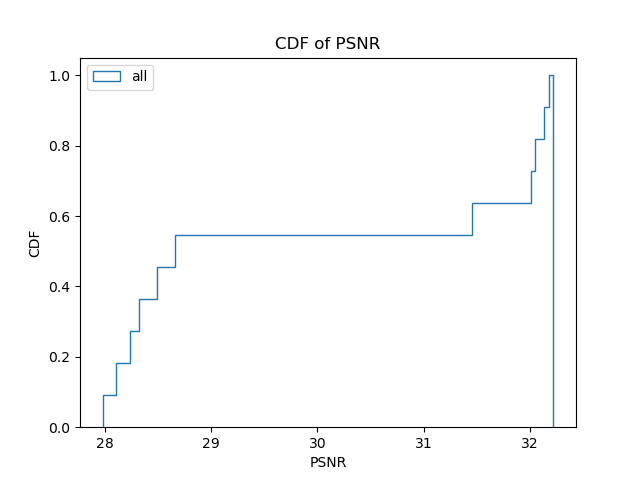

In [27]:
# psnrs_4 = np.mean(over_all["per_frame_psnr"][:5], axis=1)
# psnrs_8 = np.mean(over_all["per_frame_psnr"][5:], axis=1)
psnr = np.mean(over_all["per_frame_psnr"], axis=1)
ssim = np.mean(over_all["per_frame_ssim"], axis=1)
lpips = np.mean(over_all["per_frame_lpips"], axis=1)
print(f"psnr: {psnr}, ssim: {ssim}, lpips: {lpips}")
# plot cdf of per run average psnr
plt.figure()
# plt.hist(psnrs_4, bins=100, cumulative=True, histtype='step', density=True, label="batch 4")
# plt.hist(psnrs_8, bins=100, cumulative=True, histtype='step', density=True, label="batch 8")
plt.hist(psnr, bins=100, cumulative=True, histtype='step', density=True, label="all")
plt.xlabel("PSNR")
plt.ylabel("CDF")
plt.title("CDF of PSNR")
plt.legend()
plt.show()